<a href="https://colab.research.google.com/github/trinhtuanvubk/Image-Colorizer-Pix2Pix/blob/main/vutt_pix2pix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/
!pwd

/content/drive
/content/drive


In [9]:
%cd /content/pytorch-CycleGAN-and-pix2pix/

/content


In [11]:
!cp -r ./checkpoints/facadeedxts_pix2pix/latest_net_G.pth /content/drive/MyDrive/ckpt_temp/

In [1]:
!git clone https://github.com/thi3nnq/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2590, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 2590 (delta 0), reused 78 (delta 0), pack-reused 2512
Receiving objects: 100% (2590/2590), 52.15 MiB | 29.34 MiB/s, done.
Resolving deltas: 100% (1574/1574), done.


In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 85.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 29.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 sha256=0b3321b7f2aa80c978fc2d5effac218ec65d68e327cb9cf2c45b3b73ff716923
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=a68d1c67f65ee7368197dad73f7b5e2caac14560962d7084b744a1557deb8dfe
  Sto

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_pix2pix_dataset.sh [cityscapes, night2day, edges2handbags, edges2shoes, facades, maps]`

Or use your own dataset by creating the appropriate folders and adding in the images. Follow the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets).

In [ ]:
!bash ./datasets/download_pix2pix_dataset.sh facades

Specified [facades]
for details.

--2023-06-05 16:38:21--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘./datasets/facades.tar.gz’

./datasets/facades. 100%[===================>]  28.77M  3.49MB/s    in 11s     

2023-06-05 16:38:31 (2.65 MB/s) - ‘./datasets/facades.tar.gz’ saved [30168306/30168306]

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/1

In [4]:
!python3 datasets/combine_A_and_B.py --fold_A own_data/A --fold_B own_data/B --fold_AB own_data/AB

[fold_A] =  own_data/A
[fold_B] =  own_data/B
[fold_AB] =  own_data/AB
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
split = dev, use 4/4 images
split = dev, number of images = 4
split = test, use 3/3 images
split = test, number of images = 3
split = train, use 26/26 images
split = train, number of images = 26


# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [5]:
!bash ./scripts/download_pix2pix_model.sh facades_label2photo

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [facades_label2photo]
for details.

--2023-06-06 15:36:23--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’

./checkpoints/facad 100%[===================>] 207.62M  58.3MB/s    in 3.9s    

2023-06-06 15:36:27 (53.1 MB/s) - ‘./checkpoints/facades_label2photo_pretrained/latest_net_G.pth’ saved [217704720/217704720]



# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

In [6]:
!python train.py --dataroot ./own_data/AB --name facadeedxts_pix2pix --model pix2pix --display_id -1

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./own_data/AB                 	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
 

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [ ]:
!ls checkpoints/

facadeedxts_pix2pix  facades_label2photo_pretrained


In [ ]:
!ls

In [ ]:
!python test.py --dataroot ./own_data/AB --model pix2pix --name facadeedxts_pix2pix --use_wandb

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./own_data/AB                 	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Visualize

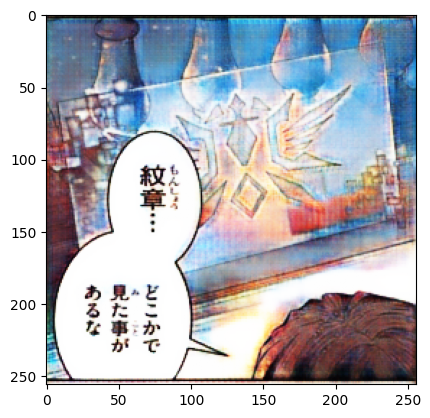

In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('./results/facadeedxts_pix2pix/test_latest/images/otomegesekai_ch72_07-1_fake_B.png')
plt.imshow(img)

In [ ]:
img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_real_A.png')
plt.imshow(img)

In [ ]:
img = plt.imread('./results/facades_label2photo_pretrained/test_latest/images/100_real_B.png')
plt.imshow(img)